In [29]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set_context('poster',font_scale=.8)
sns.set_style('whitegrid')
mpl.rc('figure',figsize=(15,2))

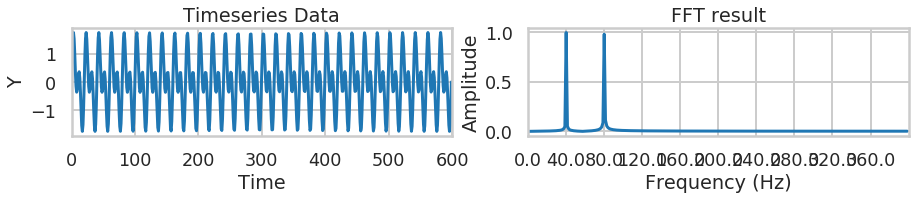

In [30]:
# Simulate Timeseries Data
N = 600 # number of smaples
T = 1.0 / 800.0 # sample spacing
x = np.linspace(0.0, N*T, N) # generate x
y1 = np.sin(40.0 * 2.0*np.pi*x)+np.sin(80.0 * 2.0*np.pi*x) # generate data

f,ax=plt.subplots(1,2,figsize=(15,2))
# plot timeseries
ax[0].plot(y1)
ax[0].set(ylabel='Y',xlabel='Time',title='Timeseries Data',xlim=[0,N])
# Plot fft
ticksteps = 30
yf = fft(y1) # perform FFT
amp = 2.0/N * np.abs(yf)
ax[1].plot(amp[:N//2])
ax[1].set(xticks=(np.arange(0,N//2,ticksteps)), ylabel='Amplitude',xlabel='Frequency (Hz)',title='FFT result',xlim=[0,N//2])
ax[1].set_xticklabels(np.round(fftfreq(N,T)[:N//2],2)[::ticksteps],rotation=0)
plt.show()

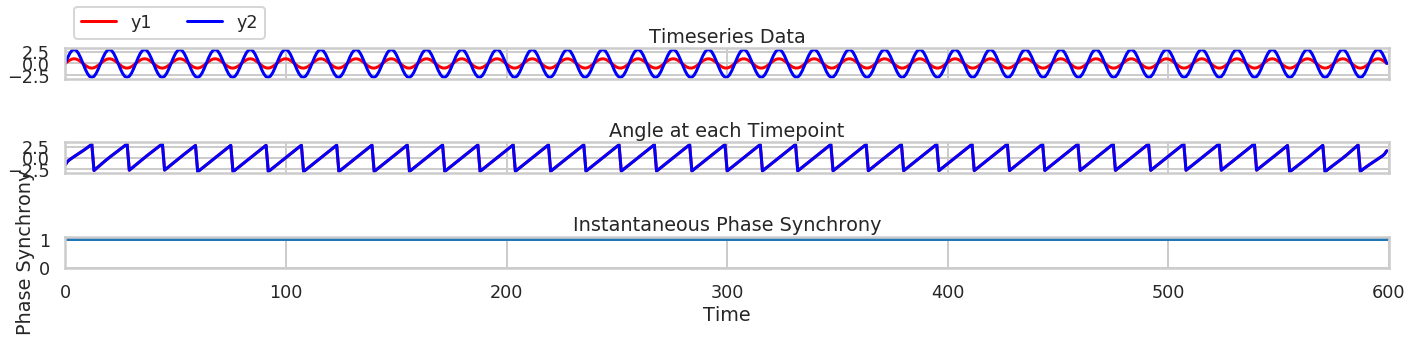

In [39]:
N = 600 # number of smaples
T = 1.0 / 800.0 # sample spacing
x = np.linspace(0.0, N*T, N)
phase_y1, phase_y2 = 50., 50.
amp_y1, amp_y2 = 1.,3.
y1 = amp_y1*np.sin(phase_y1 * 2.0*np.pi*x)
y2 = amp_y2*np.sin(phase_y2 * 2.0*np.pi*x)
window=10
al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
f,ax = plt.subplots(3,1,figsize=(20,5),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(title='Angle at each Timepoint')
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

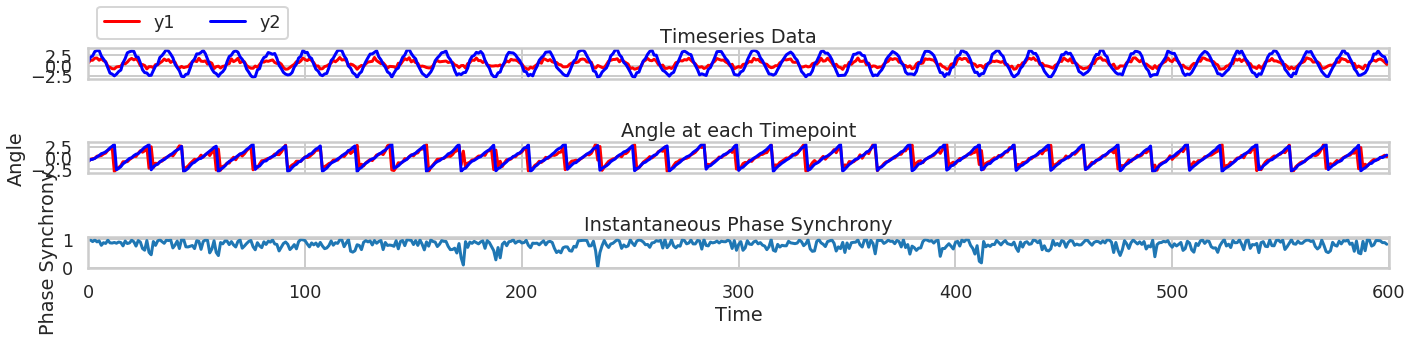

In [40]:
N = 600 # number of smaples
T = 1.0 / 800.0 # sample spacing
x = np.linspace(0.0, N*T, N)
phase_y1, phase_y2 = 50., 50.
amp_y1, amp_y2 = 1.,3.
y1 = amp_y1*np.sin(phase_y1 * 2.0*np.pi*x)+np.random.rand(N)
y2 = amp_y2*np.sin(phase_y2 * 2.0*np.pi*x)+np.random.rand(N)
window=10
al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
f,ax = plt.subplots(3,1,figsize=(20,5),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint')
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

In [55]:
tmp = pd.DataFrame(dict({'al1':al1, 'al2':al2}))

In [74]:
win_roll.fillna(0)

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.997613
         ...   
595    0.998628
596   -0.603524
597   -0.811721
598   -0.125520
599   -0.029584
Length: 600, dtype: float64

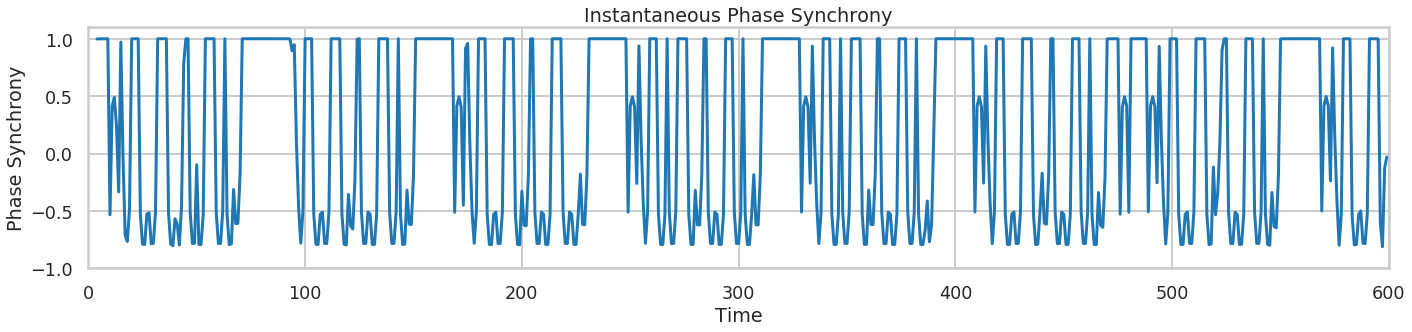

In [78]:
# win_roll = tmp['al1'].rolling(5).corr(tmp['al2'].rolling(5))
f,ax = plt.subplots(1,1,figsize=(20,5),sharex=True)
ax.plot(win_roll)
ax.set(ylim=[-1,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

Pandas computed Pearson r: 0.43770350393052904
Scipy computed Pearson r: 0.4377035039305282 and p-value: 8.129099246777557e-41


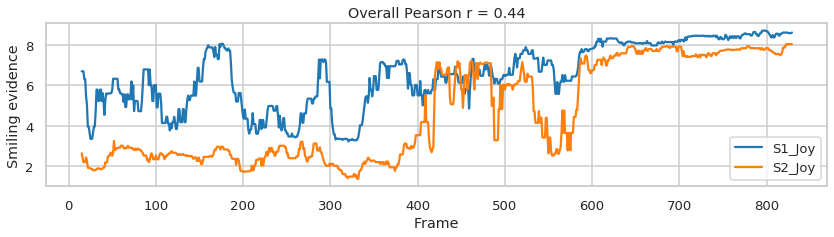

In [180]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_context('talk',font_scale=.8)

df = pd.read_csv('result/Gata2_Nfe2.csv')
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")

r, p = stats.pearsonr(df.dropna()['S1_Joy'], df.dropna()['S2_Joy'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

f,ax=plt.subplots(figsize=(14,3))
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Frame',ylabel='Smiling evidence',title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

In [134]:
df_interpolated.shape

(535, 2)

Text(0.5, 0.98, 'Smiling data and rolling window correlation')

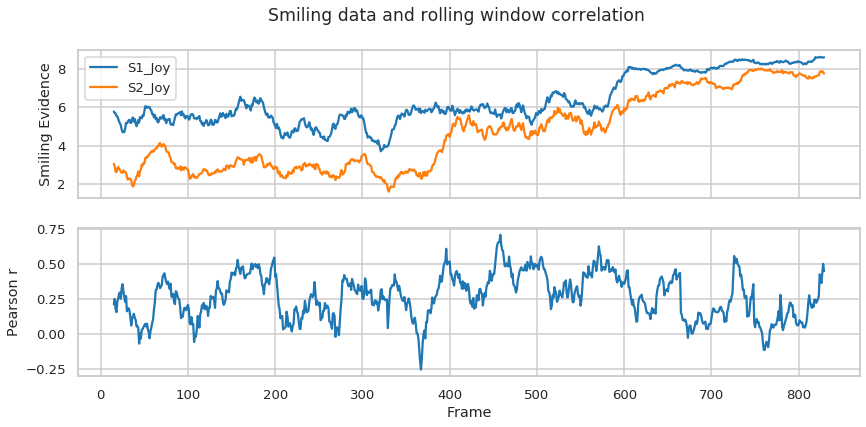

In [167]:
# Set window size to compute moving window synchrony.
r_window_size = 30
# Interpolate missing data.
df_interpolated = df.interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['S1_Joy'].rolling(window=r_window_size, center=True).corr(df_interpolated['S2_Joy'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df.rolling(window=30,center=True).mean().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")

In [157]:
d1.shift(5)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
530    6.946284
531    6.762256
532    1.102339
533    6.885822
534    1.906624
Name: S1_Joy, Length: 535, dtype: float64

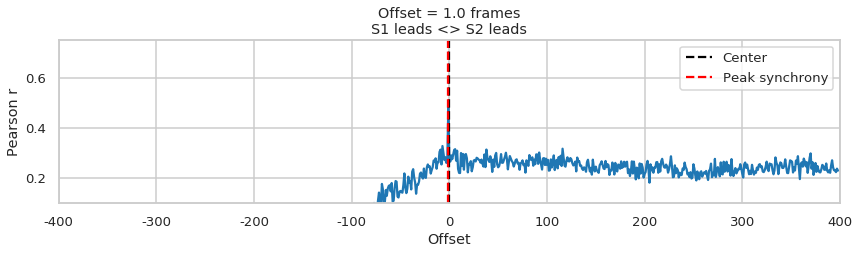

In [175]:

def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag).fillna(0))

d1 = df['S1_Joy']
d2 = df['S2_Joy']
seconds = 8
fps = 50
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.75],xlim=[0,800], xlabel='Offset',ylabel='Pearson r')
ax.set_xticklabels([int(item-400) for item in ax.get_xticks()]);
plt.legend()



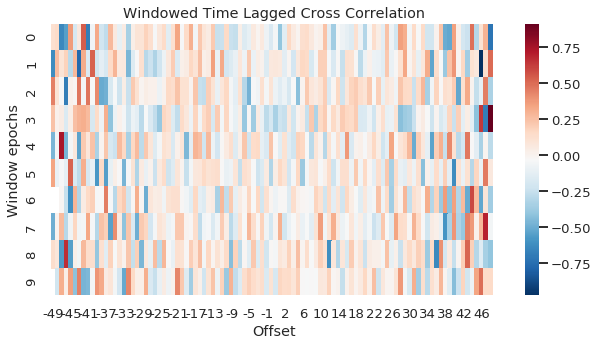

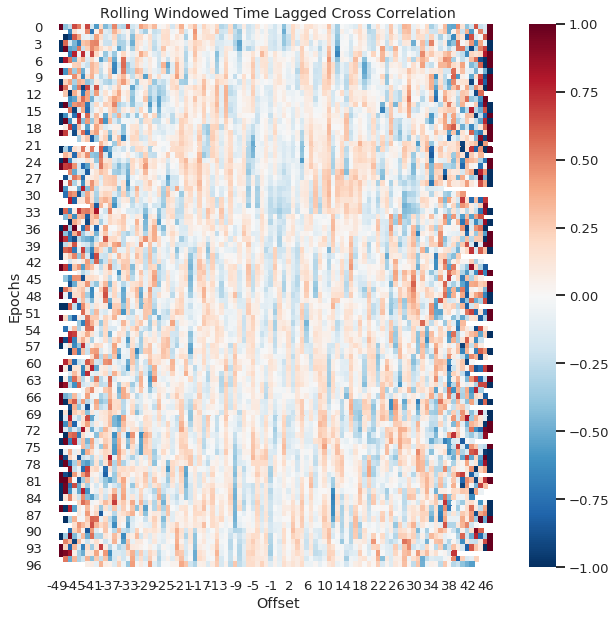

In [139]:
# Windowed time lagged cross correlation
seconds = 5
fps = 10
no_splits =10
samples_per_split = df.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df['S1_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = df['S2_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,100], xlabel='Offset',ylabel='Window epochs')
ax.set_xticklabels([int(item-50) for item in ax.get_xticks()]);

# Rolling window time lagged cross correlation
seconds = 5
fps = 10
window_size = 50 #samples
t_start = 0
t_end = t_start + window_size
step_size = 5
rss=[]
while t_end < 535:
    d1 = df['S1_Joy'].iloc[t_start:t_end]
    d2 = df['S2_Joy'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps-1),int(seconds*fps))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,100], xlabel='Offset',ylabel='Epochs')
ax.set_xticklabels([int(item-50) for item in ax.get_xticks()]);

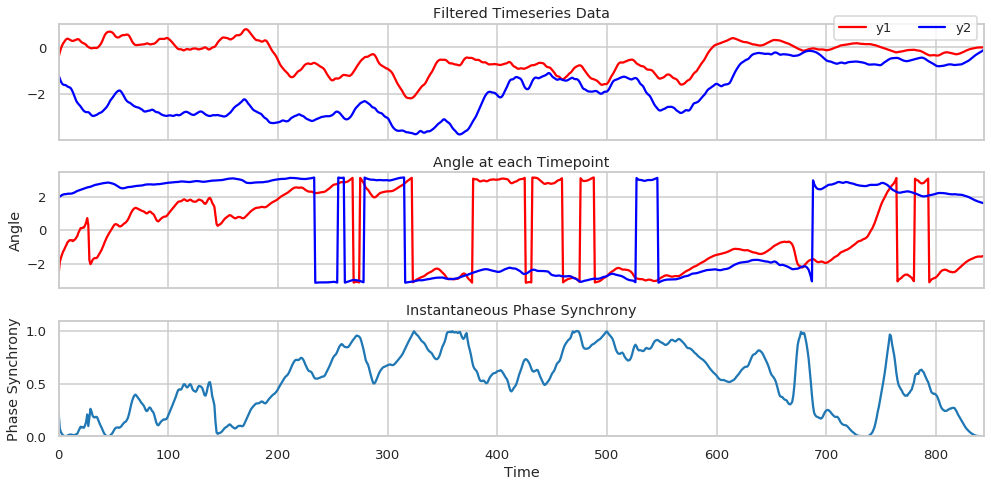

In [181]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = df['S1_Joy'].interpolate().values
d2 = df['S2_Joy'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

In [182]:
phase_synchrony.mean()

0.5257856246565854

In [207]:
import networkx as nx
G = nx.Graph([('A','B'),('C','D'),('B','C'),('D','E')])
nx.shortest_path_length(G, 'A', 'E')


4

In [248]:
Ref_edges = pd.read_csv('/home/mwu/Downloads/string_interactions_S1_S0.tsv', 
                          sep='\t').iloc[:,:2]

feature = pd.read_csv('result/S0_S1_leafMarker.txt', index_col=0, header=None).index
Ref_edges.columns = ['source', 'target']
Ref_edges['weight'] = 1
Ref_edges.shape

index_list=list()
for i in range(Ref_edges.shape[0]):
    if Ref_edges.iloc[i]['source'] == Ref_edges.iloc[i]['target']:
        index_list.append(i)
        print(Ref_edges.loc[i])
Ref_edges=Ref_edges.drop(index_list)

from itertools import product, permutations, combinations, combinations_with_replacement
Full_Ref = pd.DataFrame(combinations(set(feature), 2), columns=['source', 'target'])
Full_Ref['weight'] = 0

Ref_edges['name'] = Ref_edges['source'] + '_' + Ref_edges['target']
Full_Ref['name'] = Full_Ref['source']+ '_' + Full_Ref['target']
i = 0

for name in Ref_edges.name:
    tmp = list(name.split('_'))
    
    if name in list(Full_Ref['name']):
        
        
        Full_Ref.loc[Full_Ref.name ==  name, 'weight'] = 1
    
    elif tmp[1] + '_' + tmp[0] in list(Full_Ref['name']):
        
        
        Full_Ref.loc[Full_Ref.name == tmp[1] + '_' + tmp[0], 'weight'] = 1
    
    else:
        i = i +1

In [249]:
Full_Ref[Full_Ref.weight == 1].shape

(448, 4)

In [250]:
Tmp = Full_Ref[Full_Ref.weight == 1]
G = nx.from_pandas_edgelist(Tmp)
path_len = list()
for i in range(Full_Ref.shape[0]):
    if Full_Ref.iloc[i]['source'] in G.nodes and Full_Ref.iloc[i]['target'] in G.nodes:
        if nx.has_path(G, Full_Ref.iloc[i]['source'], Full_Ref.iloc[i]['target']):
            path_len.append(nx.shortest_path_length(G, Full_Ref.iloc[i]['source'], Full_Ref.iloc[i]['target']))
        else:
            path_len.append(0)
    else:
        path_len.append(0)
    

Full_Ref['path_len'] = path_len
Full_Ref['weight'] = [1 if x in [1,2] else 0 for x in Full_Ref.path_len]
Full_Ref[Full_Ref.weight == 1].shape

In [ ]:
#window rolling
from itertools import product, permutations, combinations, combinations_with_replacement
import statsmodels.api as sm

subExpr = stream_gne.ExpMatrix.loc[feature, cell]

Ref = pd.DataFrame(combinations(set(feature), 2), columns=['source', 'target'])
r_window_size = [5, 10 ,30]
rank = list()
for i in range(Ref.shape[0]):
    source = Ref.loc[i]['source']
    target = Ref.loc[i]['target']
    single_rank = list()
    for window_size in r_window_size:
        
        y1 = butter_bandpass_filter(subExpr.loc[source],lowcut=lowcut,highcut=highcut,fs=fs,order=order)
        y2 = butter_bandpass_filter(subExpr.loc[target],lowcut=lowcut,highcut=highcut,fs=fs,order=order)
        
        al1 = np.angle(hilbert(y1),deg=False)
        al2 = np.angle(hilbert(y2),deg=False)
        
        df = pd.DataFrame({source:al1, target:al2})
        
        rolling_r = df[source].rolling(window=window_size, center=True).corr(df[target].rolling(window=window_size, center=True)).fillna(0)  
        single_rank.append(rolling_r)
        
    single_rank = sum(single_rank)/len(single_rank)
    rank.append(len(single_rank[single_rank > 0]) - len(single_rank[single_rank < 0]))

Ref['weight'] = rank
Ref['name'] = Ref['source'] + '_' + Ref['target']
stream_gne.NetAttrs['consensus'] = Ref

In [ ]:
#Synchrony calculation

from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import mne

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq 
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data, axis=0)
    return y

def phase_locking_value(theta1, theta2):
    complex_phase_diff = np.exp(np.complex(0,1)*(theta1 - theta2))
    plv = np.abs(np.sum(complex_phase_diff))/len(theta1)
    return plv

def synchrony_cal(df, lowcut, highcut, fs, order):
        
    lowcut  = lowcut
    highcut = highcut
    fs = fs
    order = order
    d1 = df.iloc[:,:1].interpolate().values
    d2 = df.iloc[:,:2].interpolate().values
    y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
    y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

    al1 = np.angle(hilbert(y1),deg=False)
    al2 = np.angle(hilbert(y2),deg=False)
    phase_synchrony = (1-np.sin(np.abs(al1-al2)/2)).mean()
#     phase_synchrony = phase_locking_value(al1, al2)
    
    return phase_synchrony


from itertools import product, permutations, combinations, combinations_with_replacement
subExpr = stream_gne.ExpMatrix.loc[feature, cell]

Ref = pd.DataFrame(combinations(set(feature), 2), columns=['source', 'target'])
phase_synchrony = list()
lowcut = 2
highcut = 15
fs = 50.
order = 5

for i in range(Ref.shape[0]):
    
    source = Ref.loc[i]['source']
    target = Ref.loc[i]['target']
    
    a = subExpr.loc[source]
    b = subExpr.loc[target]
    
    phase_synchrony.append(synchrony_cal(pd.DataFrame({'source':a, 'target':b}), lowcut, highcut, fs, order))
    
    
Ref['weight'] = phase_synchrony
stream_gne.NetAttrs['consensus_1'] = Ref

In [ ]:
source='Mki67'
target='Top2a'

y1 = butter_bandpass_filter(subExpr.loc[source],lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(subExpr.loc[target],lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)

df = pd.DataFrame({source:al1, target:al2})
rolling_r = df[source].rolling(window=500, center=True).corr(df[target])

f,ax=plt.subplots(2,1,figsize=(20,12),sharex=True)
df.rolling(window=500,center=True).mean().plot(ax=ax[0])
rolling_r.plot(ax=ax[1])

In /home/mwu/miniconda3/envs/stream/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mwu/miniconda3/envs/stream/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mwu/miniconda3/envs/stream/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/mwu/miniconda3/envs/stream/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/mwu/minicon

vertex: 36063 in-degree: 0 out-degree: 1 age: 36063
vertex: 9075 in-degree: 4 out-degree: 1 age: 9075
vertex: 5967 in-degree: 3 out-degree: 1 age: 5967
vertex: 1113 in-degree: 7 out-degree: 1 age: 1113
vertex: 25 in-degree: 84 out-degree: 1 age: 25
vertex: 10 in-degree: 541 out-degree: 1 age: 10
vertex: 5 in-degree: 140 out-degree: 1 age: 5
vertex: 2 in-degree: 362 out-degree: 1 age: 2
vertex: 0 in-degree: 636 out-degree: 0 age: 0
Nowhere else to go... We found the main hub!


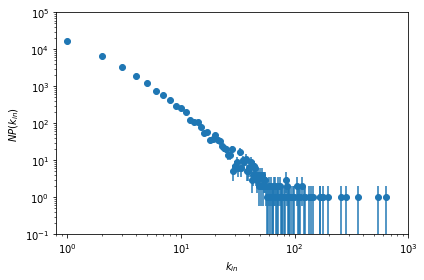

In [1]:
from __future__ import division, absolute_import, print_function
import sys
if sys.version_info < (3,):
    range = xrange
import os
from pylab import *  # for plotting
from numpy.random import *  # for random sampling
seed(42)

# We need to import the graph_tool module itself
from graph_tool.all import *

# let's construct a Price network (the one that existed before Barabasi). It is
# a directed network, with preferential attachment. The algorithm below is
# very naive, and a bit slow, but quite simple.

# We start with an empty, directed graph
g = Graph()

# We want also to keep the age information for each vertex and edge. For that
# let's create some property maps
v_age = g.new_vertex_property("int")
e_age = g.new_edge_property("int")

# The final size of the network
N = 100000

# We have to start with one vertex
v = g.add_vertex()
v_age[v] = 0

# we will keep a list of the vertices. The number of times a vertex is in this
# list will give the probability of it being selected.
vlist = [v]

# let's now add the new edges and vertices
for i in range(1, N):
    # create our new vertex
    v = g.add_vertex()
    v_age[v] = i

    # we need to sample a new vertex to be the target, based on its in-degree +
    # 1. For that, we simply randomly sample it from vlist.
    i = randint(0, len(vlist))
    target = vlist[i]

    # add edge
    e = g.add_edge(v, target)
    e_age[e] = i

    # put v and target in the list
    vlist.append(target)
    vlist.append(v)

# now we have a graph!

# let's do a random walk on the graph and print the age of the vertices we find,
# just for fun.

v = g.vertex(randint(0, g.num_vertices()))
while True:
    print("vertex:", int(v), "in-degree:", v.in_degree(), "out-degree:",
          v.out_degree(), "age:", v_age[v])

    if v.out_degree() == 0:
        print("Nowhere else to go... We found the main hub!")
        break

    n_list = []
    for w in v.out_neighbors():
        n_list.append(w)
    v = n_list[randint(0, len(n_list))]

# let's save our graph for posterity. We want to save the age properties as
# well... To do this, they must become "internal" properties:

g.vertex_properties["age"] = v_age
g.edge_properties["age"] = e_age

# now we can save it
g.save("price.xml.gz")


# Let's plot its in-degree distribution
in_hist = vertex_hist(g, "in")

y = in_hist[0]
err = sqrt(in_hist[0])
err[err >= y] = y[err >= y] - 1e-2

figure(figsize=(6,4))
errorbar(in_hist[1][:-1], in_hist[0], fmt="o", yerr=err,
        label="in")
gca().set_yscale("log")
gca().set_xscale("log")
gca().set_ylim(1e-1, 1e5)
gca().set_xlim(0.8, 1e3)
subplots_adjust(left=0.2, bottom=0.2)
xlabel("$k_{in}$")
ylabel("$NP(k_{in})$")
tight_layout()
savefig("price-deg-dist.pdf")
savefig("price-deg-dist.svg")

In [2]:
g = load_graph("price.xml.gz")
age = g.vertex_properties["age"]

pos = sfdp_layout(g)
graph_draw(g, pos, output_size=(1000, 1000), vertex_color=[1,1,1,0],
           vertex_fill_color=age, vertex_size=1, edge_pen_width=1.2,
           vcmap=matplotlib.cm.gist_heat_r, output="price.pdf")

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f29429bc908, at 0x7f294298b588>

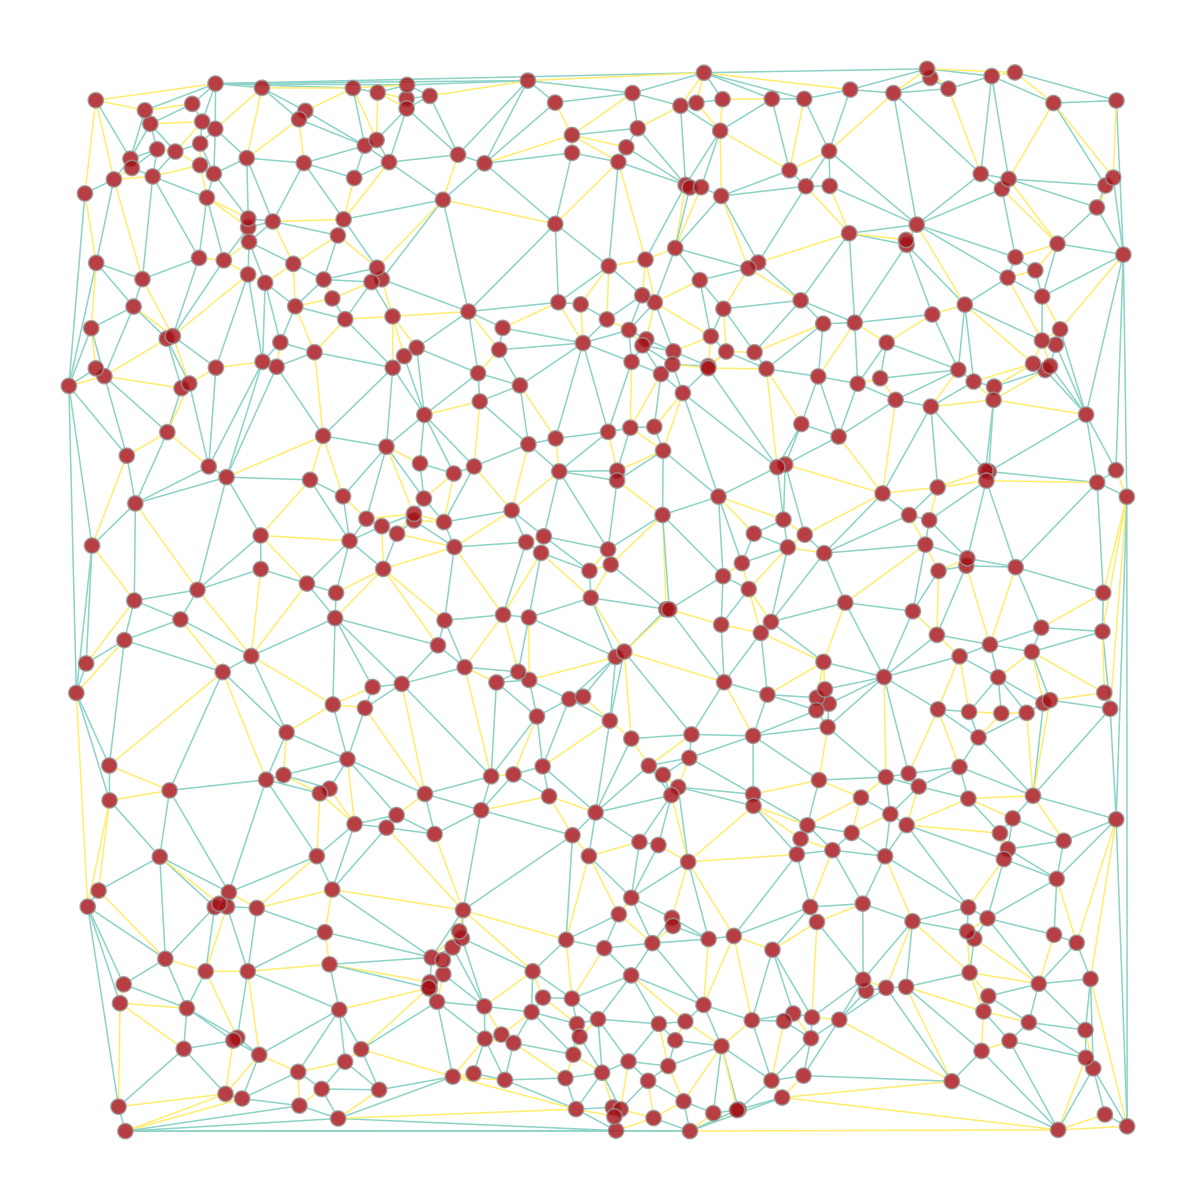

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2942a18b38, at 0x7f29429bcc50>

In [4]:
g, pos = triangulation(random((500, 2)) * 4, type="delaunay")
tree = min_spanning_tree(g)
graph_draw(g, pos=pos, edge_color=tree)

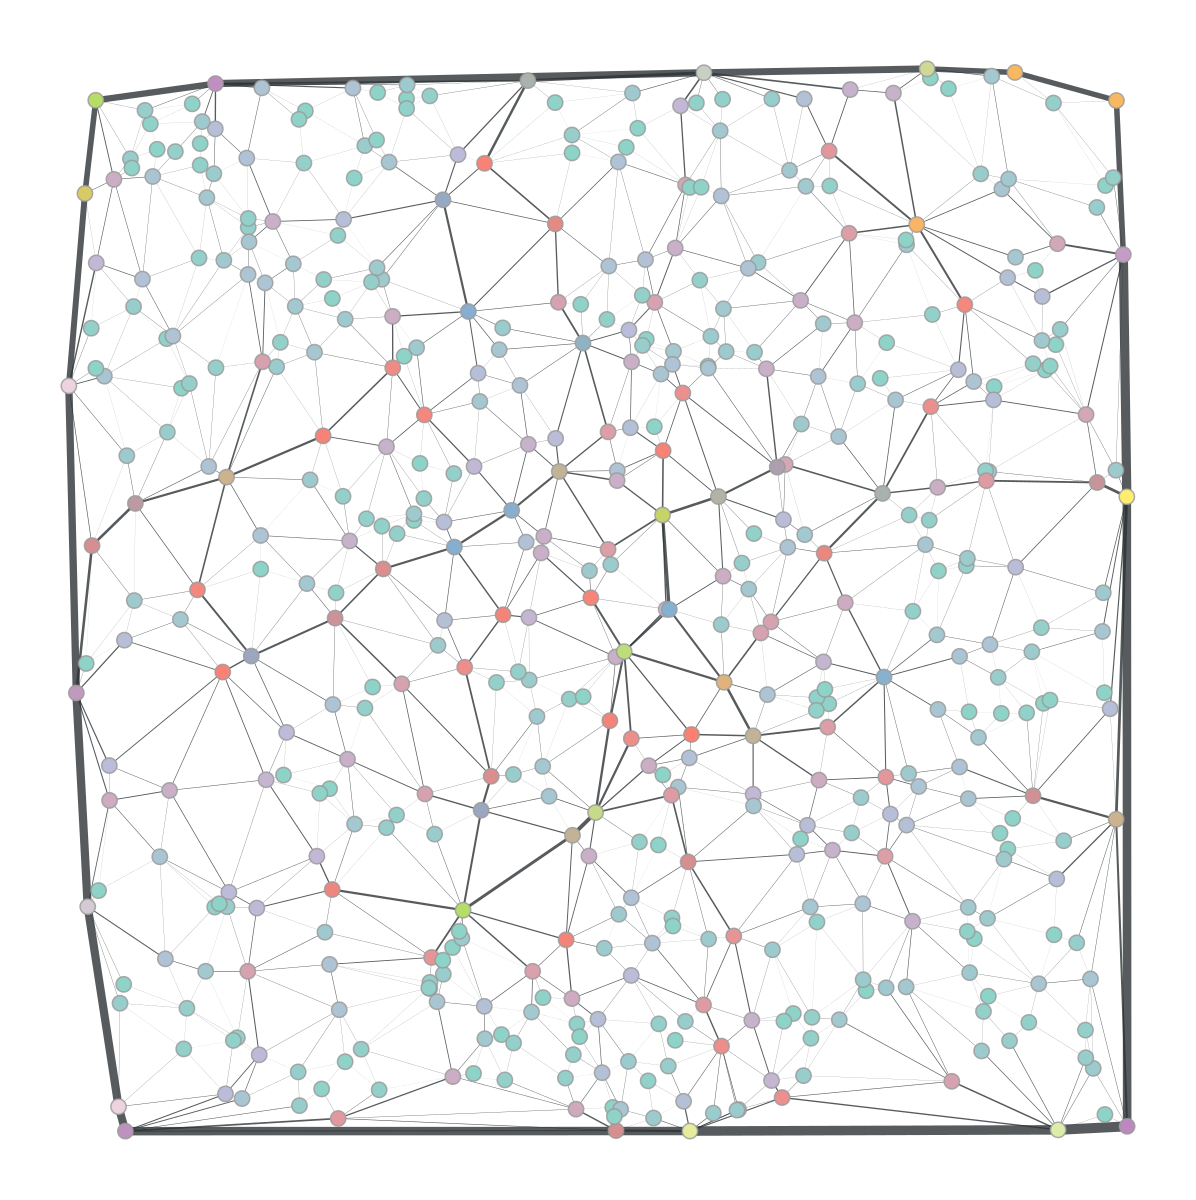

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2942a18b38, at 0x7f29429bcc50>

In [6]:
bv, be = betweenness(g)
be.a /= be.a.max() / 5
graph_draw(g, pos=pos, vertex_fill_color=bv, edge_pen_width=be)

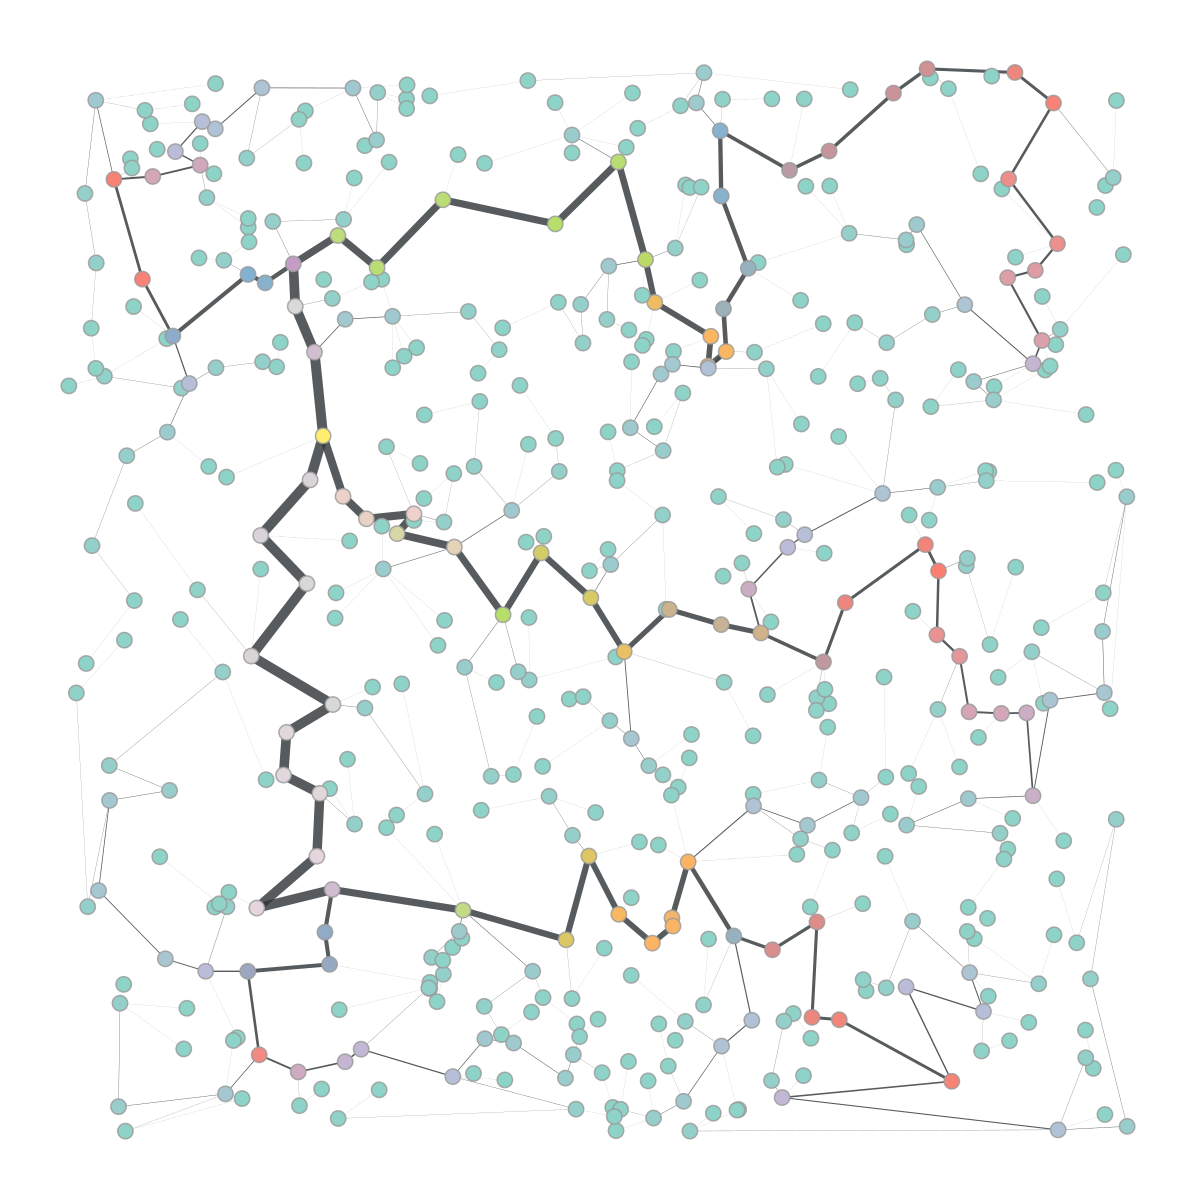

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2942a18b38, at 0x7f29429bcc50>

In [8]:
ug = GraphView(g, directed=True)
tv = GraphView(g, efilt=tree)

bv, be = betweenness(tv)
be.a /= be.a.max() / 5
graph_draw(tv, pos=pos, vertex_fill_color=bv,
            edge_pen_width=be)

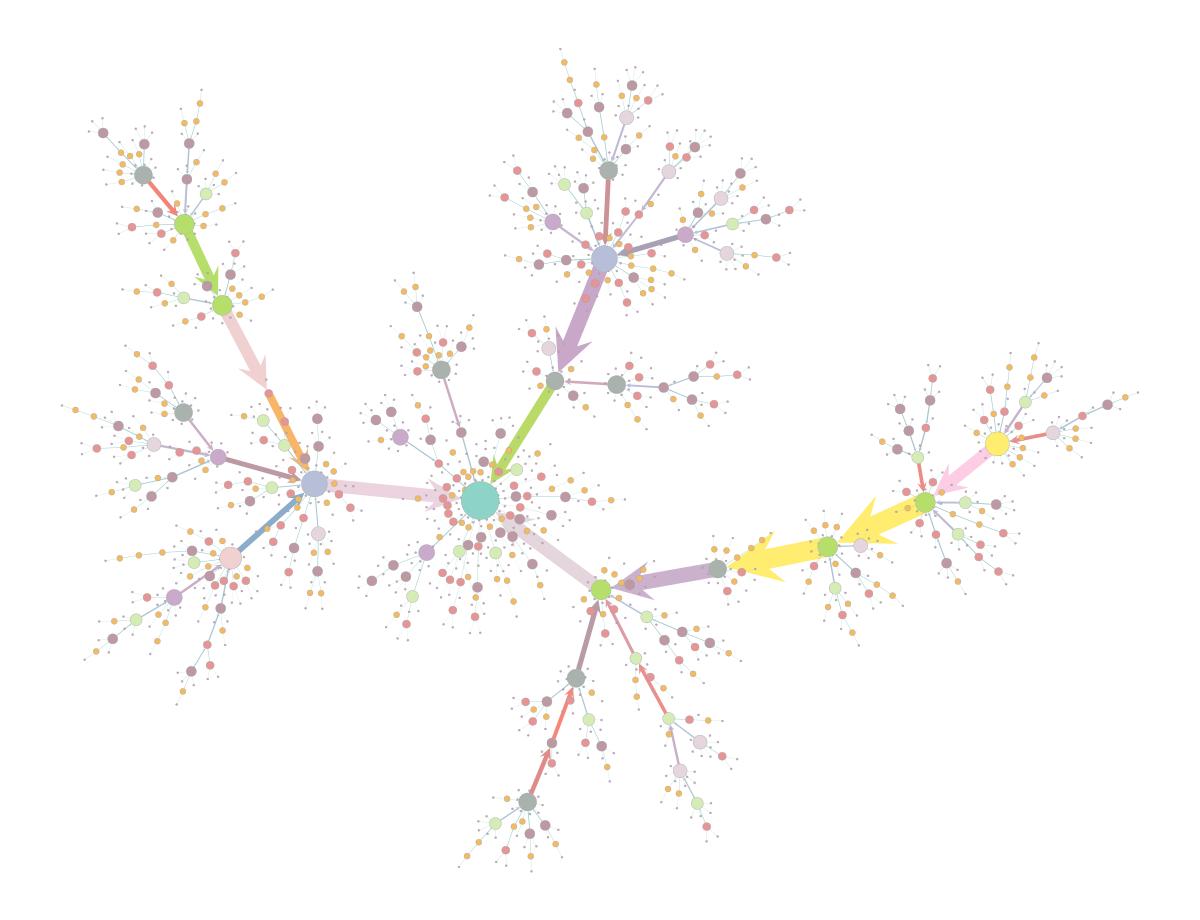

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f28b82500b8, at 0x7f28b8239588>

In [13]:
import graph_tool.all as gt

g = gt.price_network(1500)

deg = g.degree_property_map("in")

deg.a = 4 * (sqrt(deg.a) * 0.5 + 0.4)

ebet = gt.betweenness(g)[1]

ebet.a /= ebet.a.max() / 10.

eorder = ebet.copy()

eorder.a *= -1

pos = gt.sfdp_layout(g)

control = g.new_edge_property("vector<double>")

for e in g.edges():

    d = sqrt(sum((pos[e.source()].a - pos[e.target()].a) ** 2)) / 5

    control[e] = [0.3, d, 0.7, d]

gt.graph_draw(g, pos=pos, vertex_size=deg, vertex_fill_color=deg, vorder=deg,

              edge_color=ebet, eorder=eorder, edge_pen_width=ebet,

              edge_control_points=control)

In [41]:
import pandas as pd
pd.DataFrame(deg.get_array())


0
0     19
1     13
2      4
3      5
4      9
...   ..
1495   1
1496   1
1497   1
1498   1
1499   1

[1500 rows x 1 columns]

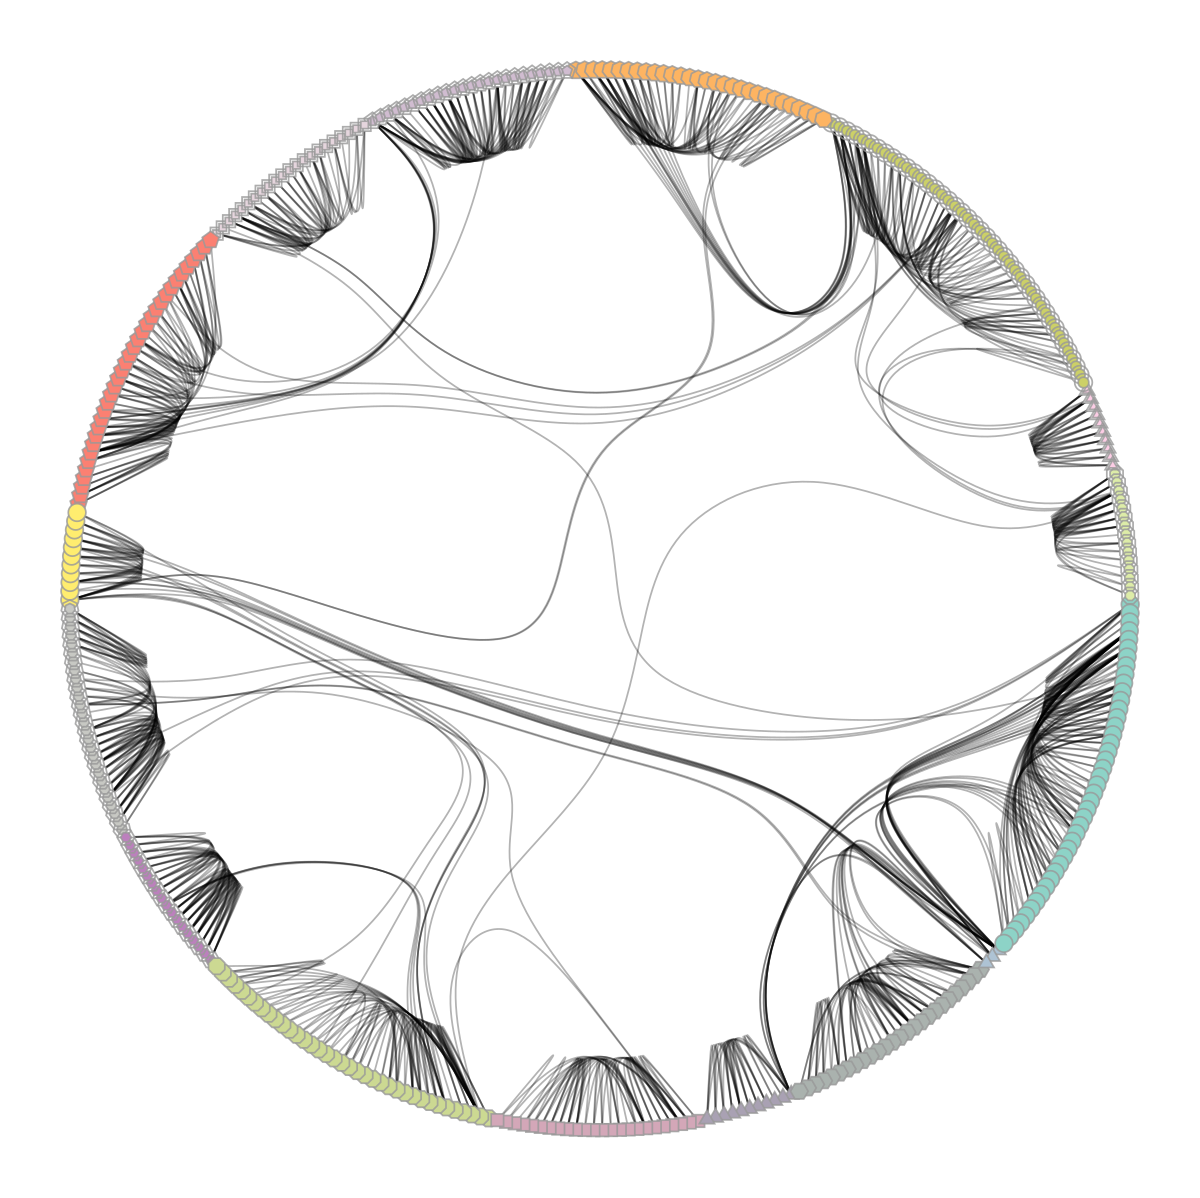

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f28b83ecd30, at 0x7f28b83ecba8>

In [20]:
g = gt.collection.data["netscience"]
g = gt.GraphView(g, vfilt=gt.label_largest_component(g))
g.purge_vertices()
state = gt.minimize_nested_blockmodel_dl(g, deg_corr=True)
t = gt.get_hierarchy_tree(state)[0]
tpos = pos = gt.radial_tree_layout(t, t.vertex(t.num_vertices() - 1), weighted=True)
cts = gt.get_hierarchy_control_points(g, t, tpos)
pos = g.own_property(tpos)
b = state.levels[0].b
shape = b.copy()
shape.a %= 14
gt.graph_draw(g, pos=pos, vertex_fill_color=b, vertex_shape=shape, edge_control_points=cts,
               edge_color=[0, 0, 0, 0.3], vertex_anchor=0)

In [51]:
len(be.get_array())

1480

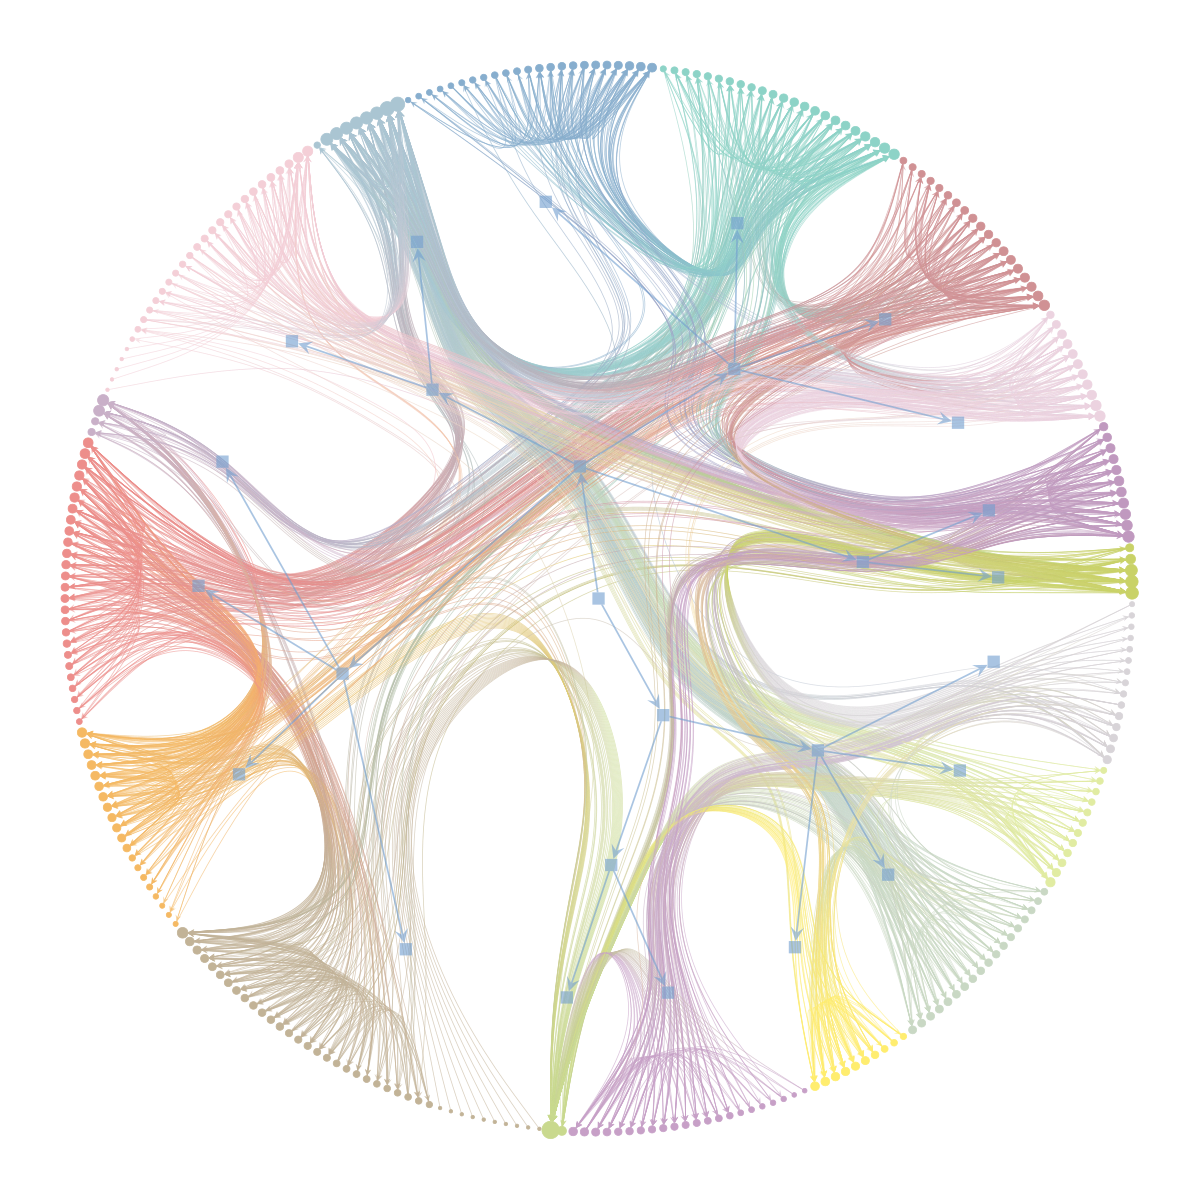

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f28b83ec3c8, at 0x7f29429bc240>,
 <Graph object, directed, with 324 vertices and 323 edges, at 0x7f28b060d5c0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f28b060d5c0, at 0x7f2942c58da0>)

In [22]:
g = gt.collection.data["celegansneural"]
state = gt.minimize_nested_blockmodel_dl(g, deg_corr=True)
gt.draw_hierarchy(state)